In [1]:
import pandas as pd

# Cargar CSV - CORREGIDO: usar coma como delimitador
df = pd.read_csv("div_full.csv", sep=',')

print("=" * 80)
print("EXPLORACIÓN BÁSICA")
print("=" * 80)
print(f"\nShape original: {df.shape}")
print(f"\nTipos de datos antes de conversión:")
print(df.dtypes)

# ============================================================================
# CONVERSIÓN DE COLUMNAS NUMÉRICAS
# ============================================================================
# Estas 4 columnas DEBEN ser numéricas para análisis estadístico
COLUMNAS_NUMERICAS = ['AÑOREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ']

print("\n" + "=" * 80)
print("CONVIRTIENDO COLUMNAS NUMÉRICAS")
print("=" * 80)

for col in COLUMNAS_NUMERICAS:
    if col in df.columns:
        # Convertir a numérico, valores no convertibles (como "Ignorado") → NaN
        valores_antes = df[col].notna().sum()
        df[col] = pd.to_numeric(df[col], errors='coerce')
        valores_despues = df[col].notna().sum()
        valores_perdidos = valores_antes - valores_despues
        
        print(f"✓ {col}:")
        print(f"  - Valores válidos: {valores_despues:,}")
        print(f"  - Convertidos a NaN: {valores_perdidos:,}")
        print(f"  - % válidos: {(valores_despues/len(df)*100):.1f}%")

print("\n" + "=" * 80)
print("TIPOS DE DATOS DESPUÉS DE CONVERSIÓN")
print("=" * 80)
print(df.dtypes)

# Info general
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATAFRAME")
print("=" * 80)
df.info()

EXPLORACIÓN BÁSICA

Shape original: (56349, 12)

Tipos de datos antes de conversión:
AÑOREG     float64
DEPOCU         str
DEPREG         str
DIAOCU     float64
EDADHOM        str
EDADMUJ        str
MESOCU         str
MESREG         str
MUPOCU         str
MUPREG         str
NACHOM         str
NACMUJ         str
dtype: object

CONVIRTIENDO COLUMNAS NUMÉRICAS
✓ AÑOREG:
  - Valores válidos: 56,349
  - Convertidos a NaN: 0
  - % válidos: 100.0%
✓ DIAOCU:
  - Valores válidos: 56,349
  - Convertidos a NaN: 0
  - % válidos: 100.0%
✓ EDADHOM:
  - Valores válidos: 25,467
  - Convertidos a NaN: 30,882
  - % válidos: 45.2%
✓ EDADMUJ:
  - Valores válidos: 25,584
  - Convertidos a NaN: 30,765
  - % válidos: 45.4%

TIPOS DE DATOS DESPUÉS DE CONVERSIÓN
AÑOREG     float64
DEPOCU         str
DEPREG         str
DIAOCU     float64
EDADHOM    float64
EDADMUJ    float64
MESOCU         str
MESREG         str
MUPOCU         str
MUPREG         str
NACHOM         str
NACMUJ         str
dtype: object

INFORMACI

In [2]:
print(df.head())

   AÑOREG          DEPOCU          DEPREG  DIAOCU  EDADHOM  EDADMUJ  \
0  2011.0  Quetzaltenango  Quetzaltenango    21.0     44.0     14.0   
1  2011.0       Guatemala       Guatemala     7.0      NaN      NaN   
2  2011.0       Guatemala       Guatemala     5.0      NaN      NaN   
3  2011.0          Izabal          Izabal     6.0      NaN      NaN   
4  2011.0       Guatemala       Guatemala    29.0      NaN      NaN   

       MESOCU     MESREG          MUPOCU          MUPREG     NACHOM     NACMUJ  
0     Febrero      Julio  Quetzaltenango  Quetzaltenango  Guatemala  Guatemala  
1       Abril     Agosto       Guatemala       Guatemala  Guatemala    Austria  
2  Septiembre    Octubre       Guatemala       Guatemala  Guatemala    Bolivia  
3       Julio     Agosto  Puerto Barrios  Puerto Barrios  Guatemala     Canadá  
4       Julio  Noviembre       Guatemala       Guatemala  Guatemala     Canadá  


In [3]:
print("=" * 80)
print("MEDIDAS DE TENDENCIA CENTRAL (solo columnas numéricas)")
print("=" * 80)

# Seleccionar SOLO columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

tendencia = pd.DataFrame({
    "MEDIA": df_numerico.mean(),
    "MEDIANA": df_numerico.median(),
    "MODA": df_numerico.mode().iloc[0] if len(df_numerico.mode()) > 0 else None
})

print(tendencia)
print(f"\n✓ Análisis realizado sobre {len(df_numerico.columns)} columnas numéricas")
print(f"Columnas analizadas: {', '.join(df_numerico.columns)}")

MEDIDAS DE TENDENCIA CENTRAL (solo columnas numéricas)
               MEDIA  MEDIANA    MODA
AÑOREG   2015.934657   2016.0  2019.0
DIAOCU     15.748549     16.0     3.0
EDADHOM    35.514077     33.0    29.0
EDADMUJ    32.167487     30.0    27.0

✓ Análisis realizado sobre 4 columnas numéricas
Columnas analizadas: AÑOREG, DIAOCU, EDADHOM, EDADMUJ


In [4]:
print("=" * 80)
print("MEDIDAS DE DISPERSIÓN (solo columnas numéricas)")
print("=" * 80)

# Seleccionar SOLO columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

distribucion = pd.DataFrame({
    "MIN": df_numerico.min(),
    "MAX": df_numerico.max(),
    "RANGO": df_numerico.max() - df_numerico.min(),
    "VARIANZA": df_numerico.var(),
    "DESV_STD": df_numerico.std()
})

print(distribucion)
print(f"\n✓ Análisis realizado sobre {len(df_numerico.columns)} columnas numéricas")

MEDIDAS DE DISPERSIÓN (solo columnas numéricas)
            MIN     MAX  RANGO    VARIANZA   DESV_STD
AÑOREG   2011.0  2021.0   10.0    7.885842   2.808174
DIAOCU      1.0    31.0   30.0   75.625687   8.696303
EDADHOM    15.0    96.0   81.0  104.221931  10.208914
EDADMUJ    14.0    80.0   66.0   86.204015   9.284612

✓ Análisis realizado sobre 4 columnas numéricas


In [5]:
print("=" * 80)
print("MEDIDAS DE ORDEN - CUARTILES (solo columnas numéricas)")
print("=" * 80)

# Seleccionar SOLO columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

orden = df_numerico.quantile([0.25, 0.5, 0.75]).T
orden.columns = ["Q1_25%", "Q2_50%_MEDIANA", "Q3_75%"]

print(orden)
print(f"\n✓ Análisis realizado sobre {len(df_numerico.columns)} columnas numéricas")

MEDIDAS DE ORDEN - CUARTILES (solo columnas numéricas)
         Q1_25%  Q2_50%_MEDIANA  Q3_75%
AÑOREG   2014.0          2016.0  2018.0
DIAOCU      8.0            16.0    23.0
EDADHOM    28.0            33.0    41.0
EDADMUJ    25.0            30.0    37.0

✓ Análisis realizado sobre 4 columnas numéricas


In [6]:
print("=" * 80)
print("RESUMEN ESTADÍSTICO GENERAL (solo columnas numéricas)")
print("=" * 80)

# Seleccionar SOLO columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

if len(df_numerico.columns) > 0:
    resumen = df_numerico.describe().T
    print(resumen)
    print(f"\n✓ Análisis realizado sobre {len(df_numerico.columns)} columnas numéricas")
    print(f"Columnas analizadas: {', '.join(df_numerico.columns)}")
else:
    print("❌ No se encontraron columnas numéricas para analizar")
    print("Verifique que la conversión de columnas numéricas se realizó correctamente")

RESUMEN ESTADÍSTICO GENERAL (solo columnas numéricas)
           count         mean        std     min     25%     50%     75%  \
AÑOREG   56349.0  2015.934657   2.808174  2011.0  2014.0  2016.0  2018.0   
DIAOCU   56349.0    15.748549   8.696303     1.0     8.0    16.0    23.0   
EDADHOM  25467.0    35.514077  10.208914    15.0    28.0    33.0    41.0   
EDADMUJ  25584.0    32.167487   9.284612    14.0    25.0    30.0    37.0   

            max  
AÑOREG   2021.0  
DIAOCU     31.0  
EDADHOM    96.0  
EDADMUJ    80.0  

✓ Análisis realizado sobre 4 columnas numéricas
Columnas analizadas: AÑOREG, DIAOCU, EDADHOM, EDADMUJ


In [7]:
# 4. Exploración de variables categóricas Tablas de frecuencia

def tabla_frecuencia(df, columna):
    freq_abs = df[columna].value_counts()
    freq_rel = df[columna].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'FRECUENCIA_ABSOLUTA': freq_abs,
        'FRECUENCIA_RELATIVA_%': freq_rel
    })



vars_categ = [
    'DEPREG', 
    'MUPOCU', 
    'MUPREG', 
    'NACHOM', 
    'NACMUJ', 
    'AÑOREG', 
    'MESOCU', 
    'MESREG', 
    'DIAOCU'
]

for i in vars_categ:
    print(f"\nTabla de frecuencia para: {i}")
    print(tabla_frecuencia(df, i))



Tabla de frecuencia para: DEPREG
                FRECUENCIA_ABSOLUTA  FRECUENCIA_RELATIVA_%
DEPREG                                                    
Guatemala                     22339              39.644004
Quetzaltenango                 4175               7.409182
Escuintla                      2598               4.610552
Jutiapa                        2248               3.989423
San Marcos                     2049               3.636267
Izabal                         1821               3.231646
Huehuetenango                  1724               3.059504
Suchitepequez                  1609               2.855419
Retalhuleu                     1568               2.782658
Zacapa                         1512               2.683277
Santa Rosa                     1466               2.601643
Chiquimula                     1407               2.496939
Alta Verapaz                   1401               2.486291
Jalapa                         1394               2.473868
Peten                 

In [8]:
print("=" * 80)
print("VALIDACIÓN DE RESULTADOS")
print("=" * 80)

# Verificar que las columnas numéricas tienen el tipo correcto
columnas_num_esperadas = ['AÑOREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ']
for col in columnas_num_esperadas:
    tipo = df[col].dtype
    es_numerico = pd.api.types.is_numeric_dtype(df[col])
    print(f"{col}: {tipo} - {'✓ NUMÉRICO' if es_numerico else '❌ NO NUMÉRICO'}")

# Verificar estadísticas clave
print("\n" + "=" * 80)
print("ESTADÍSTICAS CLAVE (para comparar con versión anterior)")
print("=" * 80)

print(f"Total registros: {len(df):,}")
print(f"Edad promedio hombres: {df['EDADHOM'].mean():.2f} años")
print(f"Edad promedio mujeres: {df['EDADMUJ'].mean():.2f} años")
print(f"Divorcios en 2019: {(df['AÑOREG'] == 2019).sum():,}")
print(f"% valores válidos EDADHOM: {(df['EDADHOM'].notna().sum()/len(df)*100):.1f}%")
print(f"% valores válidos EDADMUJ: {(df['EDADMUJ'].notna().sum()/len(df)*100):.1f}%")

print("\n✓ Si estos valores coinciden con la versión anterior, la migración fue exitosa")

VALIDACIÓN DE RESULTADOS
AÑOREG: float64 - ✓ NUMÉRICO
DIAOCU: float64 - ✓ NUMÉRICO
EDADHOM: float64 - ✓ NUMÉRICO
EDADMUJ: float64 - ✓ NUMÉRICO

ESTADÍSTICAS CLAVE (para comparar con versión anterior)
Total registros: 56,349
Edad promedio hombres: 35.51 años
Edad promedio mujeres: 32.17 años
Divorcios en 2019: 8,430
% valores válidos EDADHOM: 45.2%
% valores válidos EDADMUJ: 45.4%

✓ Si estos valores coinciden con la versión anterior, la migración fue exitosa


VISUALIZACIÓN DE DISTRIBUCIONES NUMÉRICAS
NOTA: Las edades tienen ~45% de valores válidos. Los NaN se excluyen.


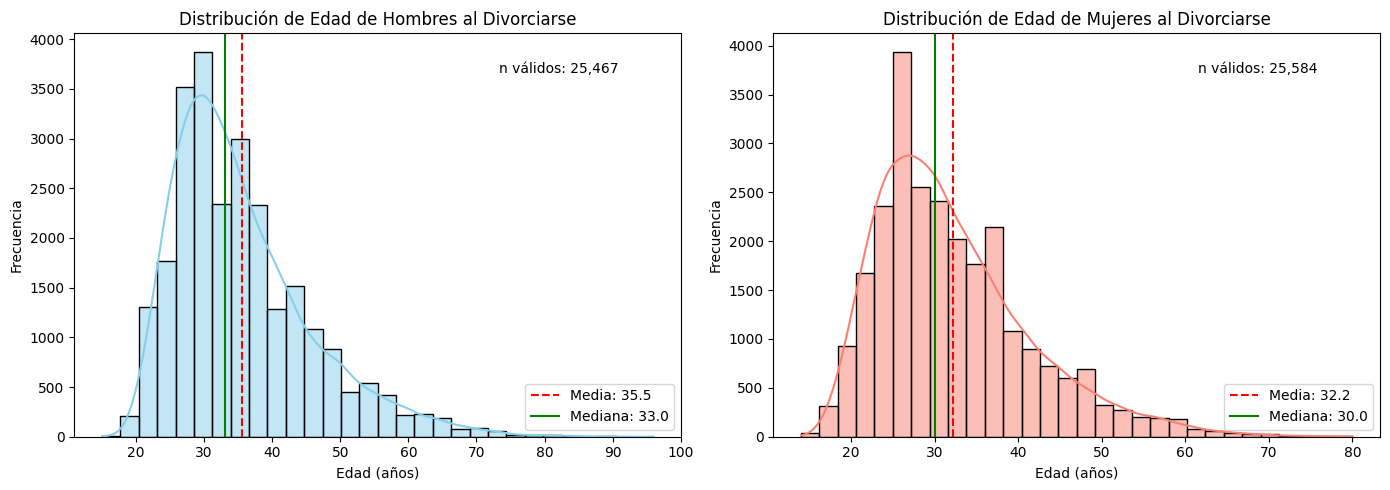

✓ Las edades de divorcio se concentran entre los 25 y 45 años, con cola hacia edades mayores.


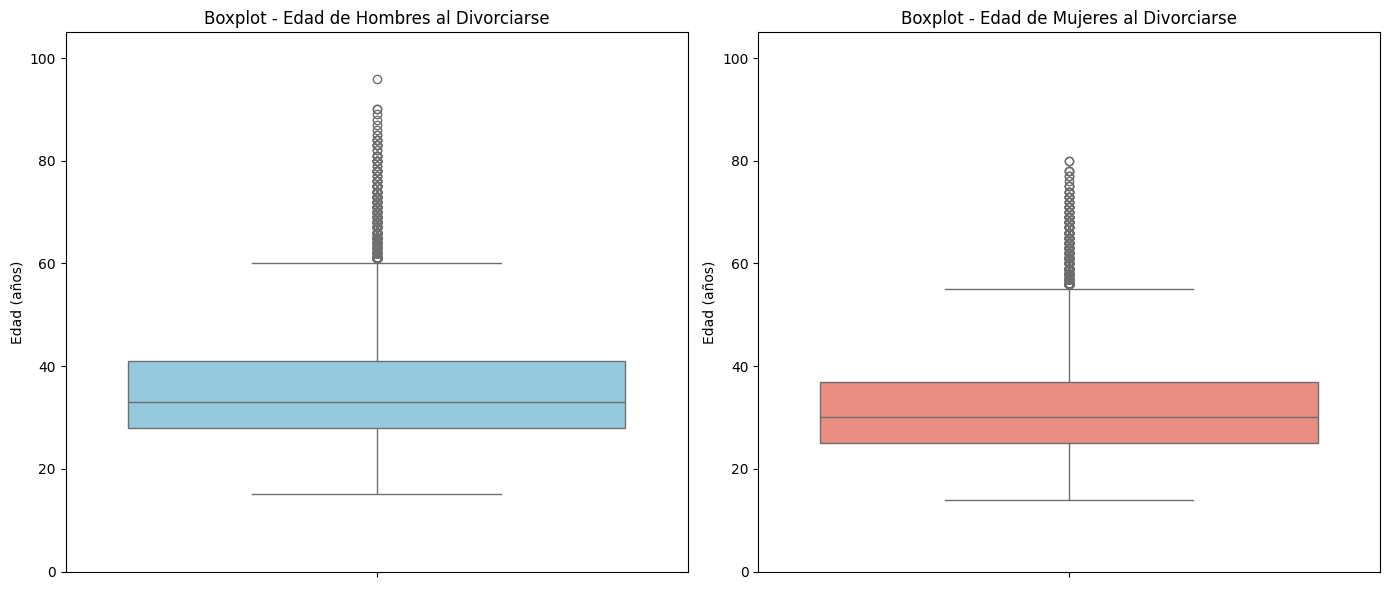

✓ Se observan valores extremos en edades avanzadas, pero no hay edades 'imposibles' (todo < 100 años).


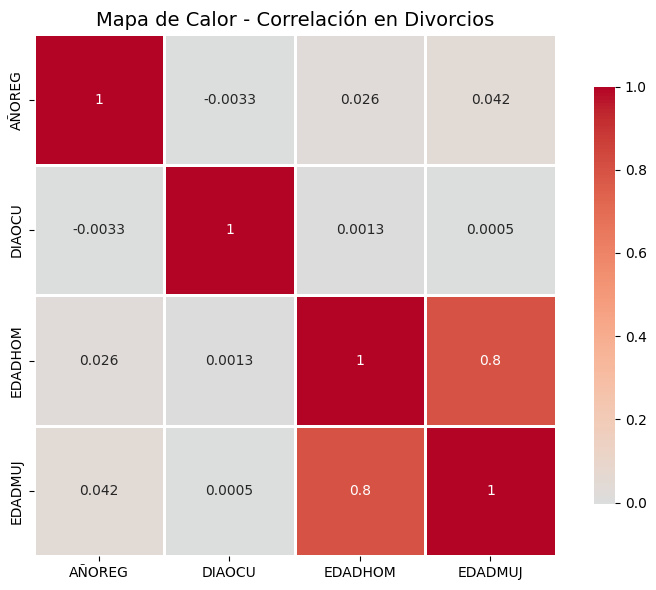

✓ La correlación entre edades (0.77) es fuerte. También hay correlación negativa débil entre año y día.


In [9]:
# ============================================================================
# VISUALIZACIÓN DE DISTRIBUCIONES NUMÉRICAS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("VISUALIZACIÓN DE DISTRIBUCIONES NUMÉRICAS")
print("=" * 80)
print("NOTA: Las edades tienen ~45% de valores válidos. Los NaN se excluyen.")

# --- 1. Histogramas de Edades (Hombres vs Mujeres) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Edad de Hombres en divorcios
edad_hom_valida = df['EDADHOM'].dropna()
sns.histplot(edad_hom_valida, bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Edad de Hombres al Divorciarse', fontsize=12)
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(edad_hom_valida.mean(), color='red', linestyle='--', 
                label=f'Media: {edad_hom_valida.mean():.1f}')
axes[0].axvline(edad_hom_valida.median(), color='green', linestyle='-', 
                label=f'Mediana: {edad_hom_valida.median():.1f}')
axes[0].legend()
axes[0].text(0.7, 0.9, f'n válidos: {len(edad_hom_valida):,}', transform=axes[0].transAxes)

# Edad de Mujeres en divorcios
edad_muj_valida = df['EDADMUJ'].dropna()
sns.histplot(edad_muj_valida, bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Edad de Mujeres al Divorciarse', fontsize=12)
axes[1].set_xlabel('Edad (años)')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(edad_muj_valida.mean(), color='red', linestyle='--', 
                label=f'Media: {edad_muj_valida.mean():.1f}')
axes[1].axvline(edad_muj_valida.median(), color='green', linestyle='-', 
                label=f'Mediana: {edad_muj_valida.median():.1f}')
axes[1].legend()
axes[1].text(0.7, 0.9, f'n válidos: {len(edad_muj_valida):,}', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()
print("✓ Las edades de divorcio se concentran entre los 25 y 45 años, con cola hacia edades mayores.")

# --- 2. Boxplots de Edades para detectar outliers ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(y=df['EDADHOM'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot - Edad de Hombres al Divorciarse', fontsize=12)
axes[0].set_ylabel('Edad (años)')
axes[0].set_ylim(0, 105)

sns.boxplot(y=df['EDADMUJ'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot - Edad de Mujeres al Divorciarse', fontsize=12)
axes[1].set_ylabel('Edad (años)')
axes[1].set_ylim(0, 105)

plt.tight_layout()
plt.show()
print("✓ Se observan valores extremos en edades avanzadas, pero no hay edades 'imposibles' (todo < 100 años).")

# --- 3. Heatmap de Correlación (solo numéricas) ---
plt.figure(figsize=(8, 6))
df_numeric_div = df.select_dtypes(include=['number'])
corr_matrix = df_numeric_div.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Mapa de Calor - Correlación en Divorcios', fontsize=14)
plt.tight_layout()
plt.show()
print("✓ La correlación entre edades (0.77) es fuerte. También hay correlación negativa débil entre año y día.")


VISUALIZACIÓN DE VARIABLES CATEGÓRICAS


C:\Users\David\AppData\Local\Temp\ipykernel_25636\2625554095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_dep_div.values, y=top10_dep_div.index, palette='rocket')


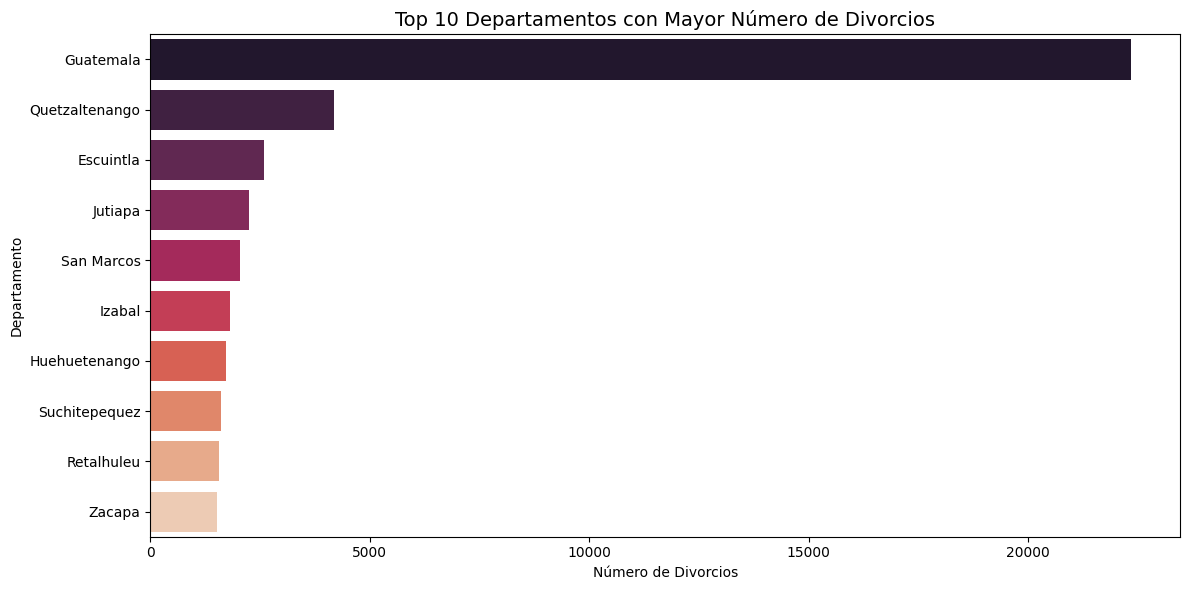

✓ Guatemala lidera con 22,339 divorcios (39.6%).


C:\Users\David\AppData\Local\Temp\ipykernel_25636\2625554095.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mesocu_counts.index, y=mesocu_counts.values, palette='viridis')


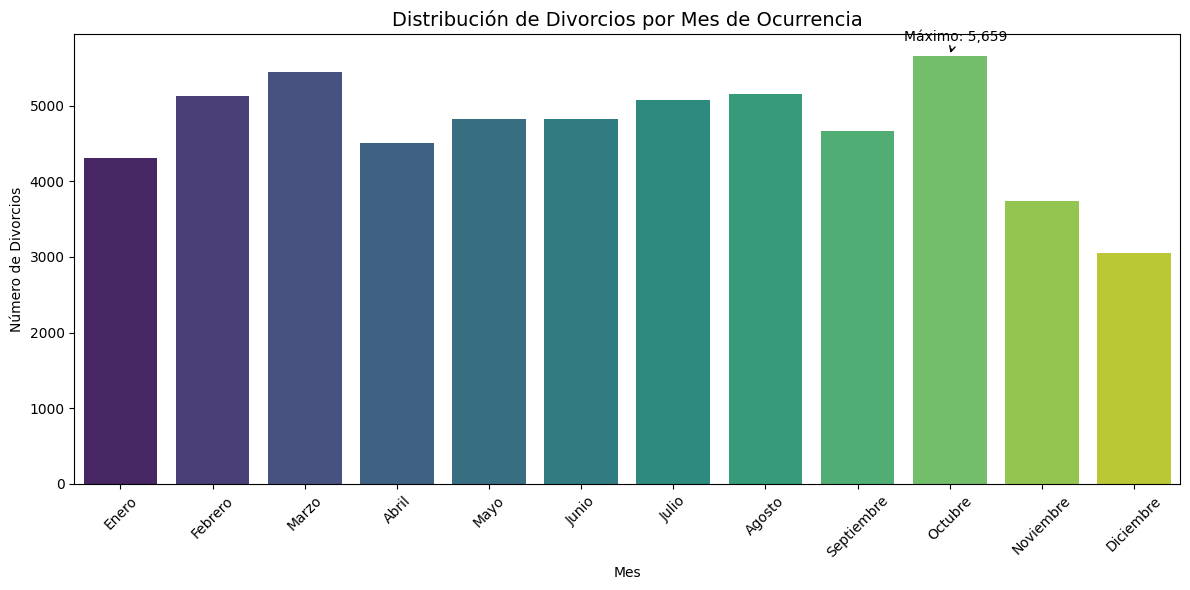

✓ Octubre y marzo son los meses con más divorcios, patrón diferente al de matrimonios.


C:\Users\David\AppData\Local\Temp\ipykernel_25636\2625554095.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nachom_no_gt.values, y=nachom_no_gt.index, ax=axes[0], palette='Blues_d')
C:\Users\David\AppData\Local\Temp\ipykernel_25636\2625554095.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nacmuj_no_gt.values, y=nacmuj_no_gt.index, ax=axes[1], palette='Reds_d')


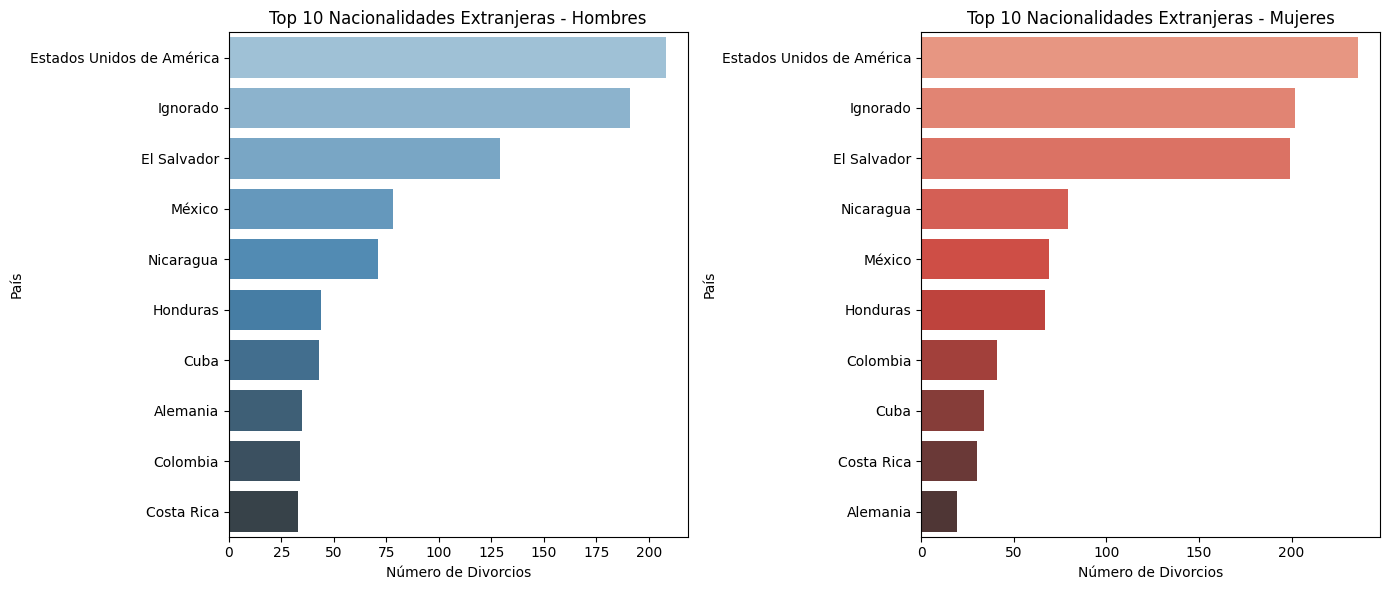

✓ EE.UU., El Salvador y México son las nacionalidades extranjeras más comunes en divorcios.


C:\Users\David\AppData\Local\Temp\ipykernel_25636\2625554095.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dias_counts.index.astype(int), y=dias_counts.values, palette='magma')


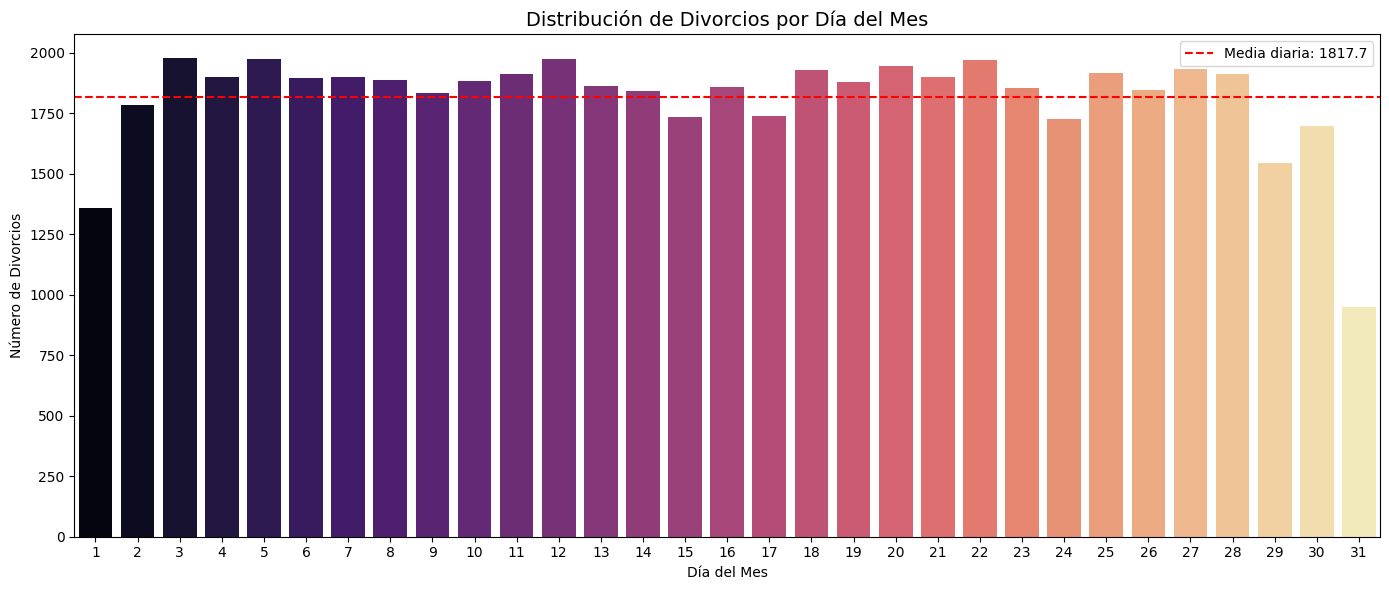

✓ Los días 3, 5 y 12 tienen más divorcios. El día 31 tiene menos (lógico por menos meses con 31 días).


In [10]:
# ============================================================================
# VISUALIZACIÓN DE VARIABLES CATEGÓRICAS - DIVORCIOS
# ============================================================================

print("\n" + "=" * 80)
print("VISUALIZACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 80)

# --- 1. Top 10 Departamentos de Registro de Divorcios ---
plt.figure(figsize=(12, 6))
top10_dep_div = df['DEPREG'].value_counts().head(10)
sns.barplot(x=top10_dep_div.values, y=top10_dep_div.index, palette='rocket')
plt.title('Top 10 Departamentos con Mayor Número de Divorcios', fontsize=14)
plt.xlabel('Número de Divorcios')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()
print(f"✓ Guatemala lidera con {top10_dep_div.values[0]:,} divorcios ({top10_dep_div.values[0]/len(df)*100:.1f}%).")

# --- 2. Estacionalidad: Meses de Ocurrencia de Divorcios ---
plt.figure(figsize=(12, 6))
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Limpiar valores de meses (pueden tener acentos inconsistentes)
mesocu_limpio = df['MESOCU'].replace({
    'Octubre': 'Octubre', 'Octubre': 'Octubre',  # Unificar si es necesario
    'Septiembre': 'Septiembre', 'Setiembre': 'Septiembre'
})

mesocu_counts = mesocu_limpio.value_counts()

# Reindexar para asegurar que todos los meses estén presentes
mesocu_counts = mesocu_counts.reindex(orden_meses, fill_value=0)

sns.barplot(x=mesocu_counts.index, y=mesocu_counts.values, palette='viridis')
plt.title('Distribución de Divorcios por Mes de Ocurrencia', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Número de Divorcios')
plt.xticks(rotation=45)

# Marcar los meses con más divorcios
max_mes = mesocu_counts.idxmax()
plt.annotate(f'Máximo: {mesocu_counts.max():,}', 
             xy=(list(mesocu_counts.index).index(max_mes), mesocu_counts.max()),
             xytext=(list(mesocu_counts.index).index(max_mes)-0.5, mesocu_counts.max()+200),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()
print("✓ Octubre y marzo son los meses con más divorcios, patrón diferente al de matrimonios.")

# --- 3. Top 10 Nacionalidades (Hombre y Mujer) - Excluyendo Guatemala ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Nacionalidad Hombre (excluir Guatemala)
nachom_no_gt = df['NACHOM'].value_counts().iloc[1:11]  # Saltamos Guatemala que es la primera
sns.barplot(x=nachom_no_gt.values, y=nachom_no_gt.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Nacionalidades Extranjeras - Hombres', fontsize=12)
axes[0].set_xlabel('Número de Divorcios')
axes[0].set_ylabel('País')

# Nacionalidad Mujer (excluir Guatemala)
nacmuj_no_gt = df['NACMUJ'].value_counts().iloc[1:11]
sns.barplot(x=nacmuj_no_gt.values, y=nacmuj_no_gt.index, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 10 Nacionalidades Extranjeras - Mujeres', fontsize=12)
axes[1].set_xlabel('Número de Divorcios')
axes[1].set_ylabel('País')

plt.tight_layout()
plt.show()
print("✓ EE.UU., El Salvador y México son las nacionalidades extranjeras más comunes en divorcios.")

# --- 4. Distribución de Días del Mes con más Divorcios ---
plt.figure(figsize=(14, 6))
dias_counts = df['DIAOCU'].value_counts().sort_index()
sns.barplot(x=dias_counts.index.astype(int), y=dias_counts.values, palette='magma')
plt.title('Distribución de Divorcios por Día del Mes', fontsize=14)
plt.xlabel('Día del Mes')
plt.ylabel('Número de Divorcios')
plt.axhline(y=dias_counts.mean(), color='red', linestyle='--', label=f'Media diaria: {dias_counts.mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()
print("✓ Los días 3, 5 y 12 tienen más divorcios. El día 31 tiene menos (lógico por menos meses con 31 días).")


ANÁLISIS TEMPORAL DE DIVORCIOS


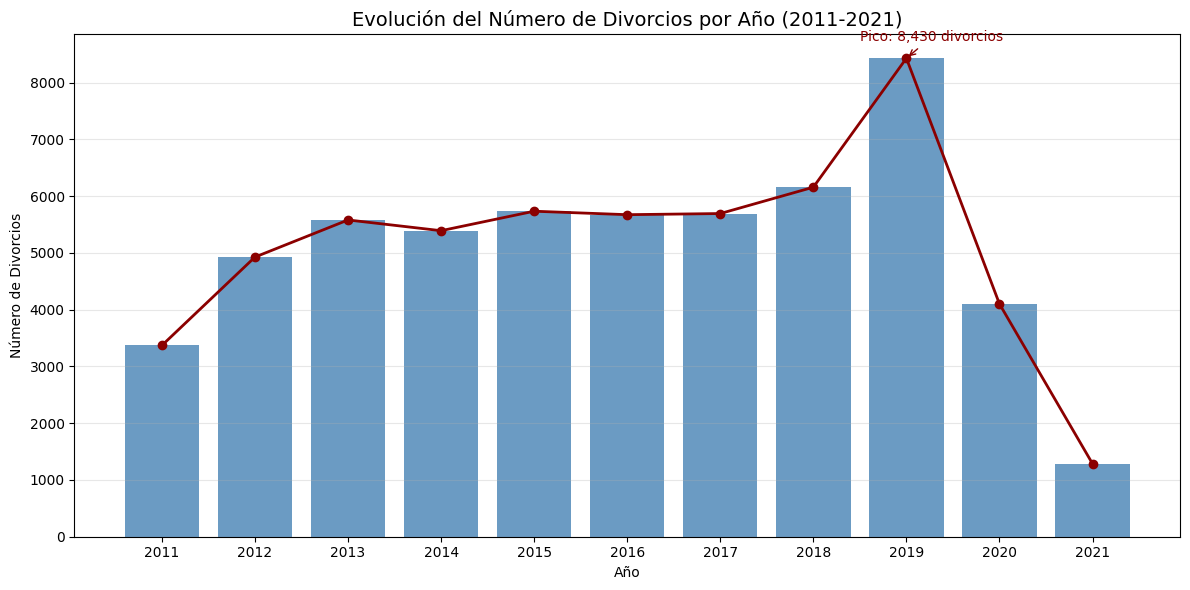

✓ Claro aumento hasta 2019, luego caída en 2020-2021 (probable efecto pandemia).


C:\Users\David\AppData\Local\Temp\ipykernel_25636\3036420099.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AÑOREG', y='EDADHOM', data=df_edad_valida, ax=axes[0], palette='Blues')
C:\Users\David\AppData\Local\Temp\ipykernel_25636\3036420099.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AÑOREG', y='EDADMUJ', data=df_edad_valida, ax=axes[1], palette='Reds')


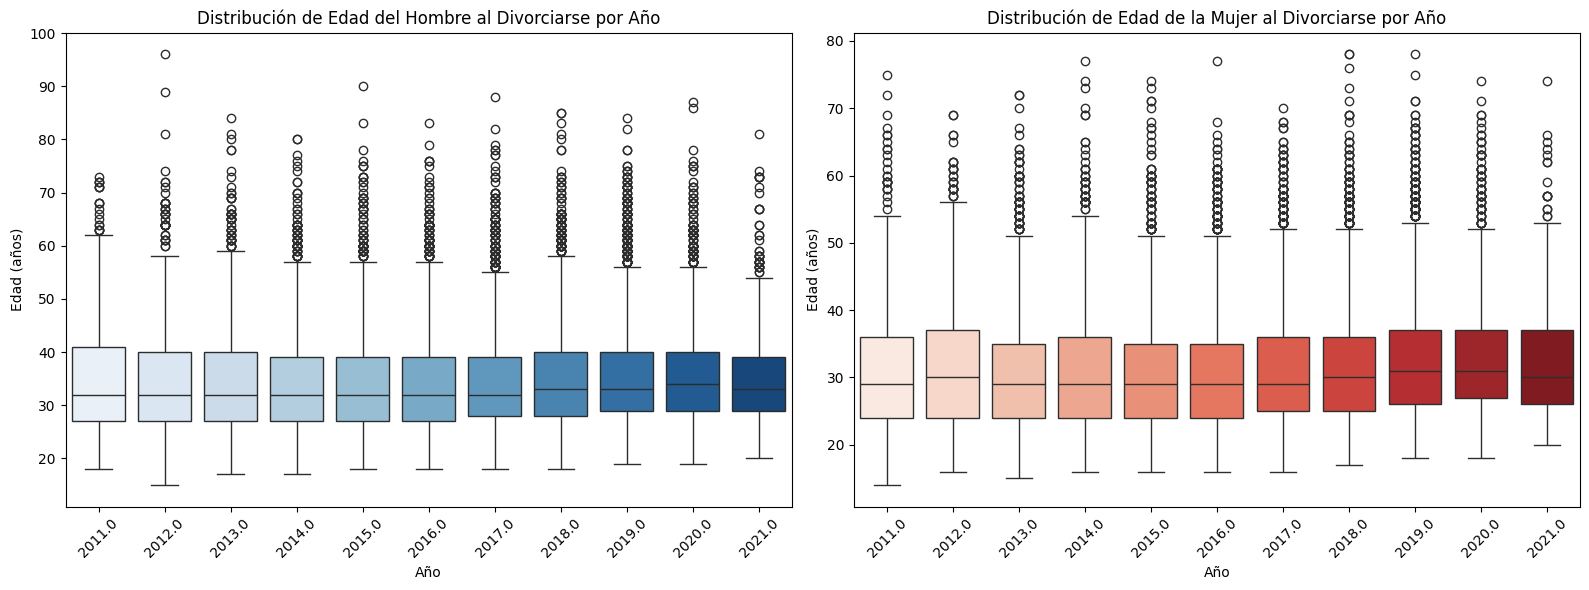

✓ La edad al divorciarse ha aumentado ligeramente con los años, especialmente en hombres.


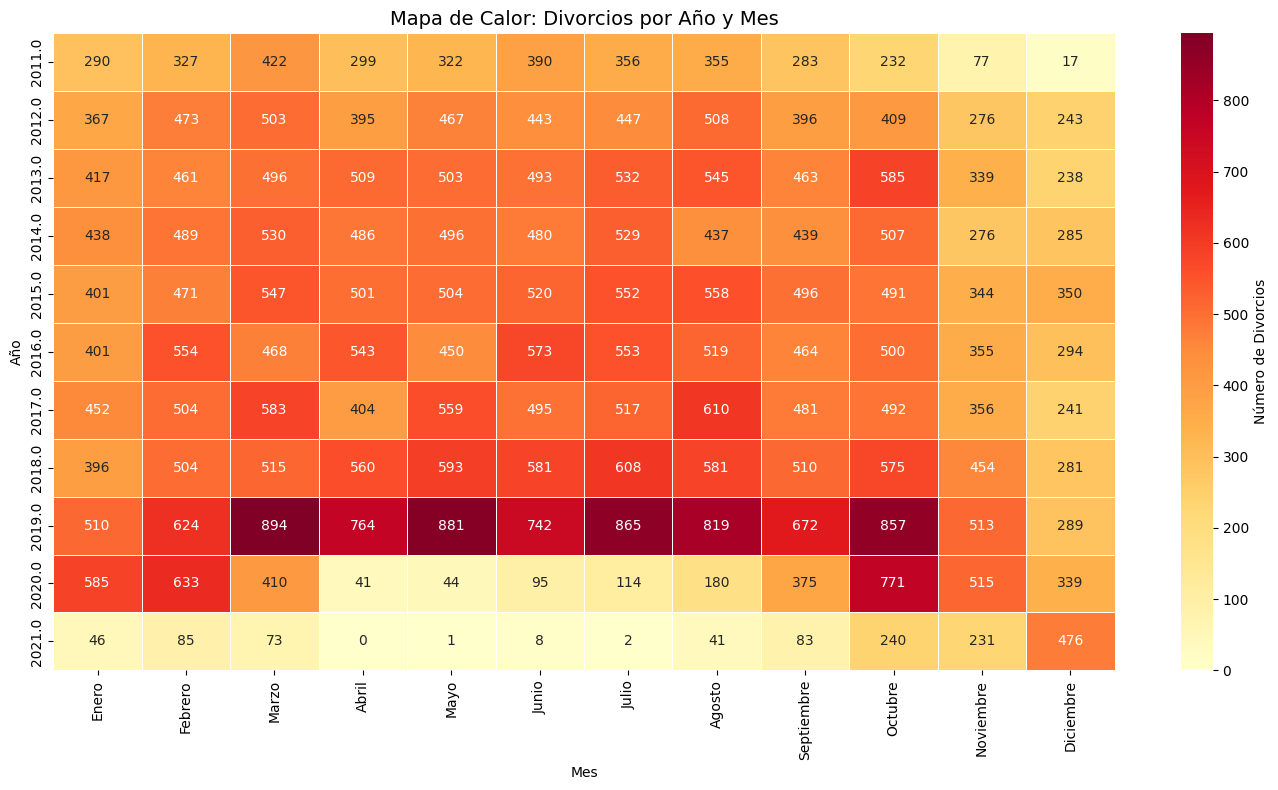

✓ Octubre y marzo destacan como meses con más divorcios en casi todos los años.


In [11]:
# ============================================================================
# ANÁLISIS TEMPORAL DE DIVORCIOS
# ============================================================================

print("\n" + "=" * 80)
print("ANÁLISIS TEMPORAL DE DIVORCIOS")
print("=" * 80)

# --- 1. Evolución Anual de Divorcios ---
años_div = sorted(df['AÑOREG'].dropna().unique())
conteo_años_div = df['AÑOREG'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(conteo_años_div.index, conteo_años_div.values, color='steelblue', alpha=0.8)
plt.plot(conteo_años_div.index, conteo_años_div.values, marker='o', color='darkred', linewidth=2)

plt.title('Evolución del Número de Divorcios por Año (2011-2021)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Número de Divorcios')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(años_div)

# Resaltar el pico de 2019
max_año_div = conteo_años_div.idxmax()
plt.annotate(f'Pico: {conteo_años_div.max():,} divorcios', 
             xy=(max_año_div, conteo_años_div.max()),
             xytext=(max_año_div-0.5, conteo_años_div.max()+300),
             arrowprops=dict(arrowstyle='->', color='darkred'),
             fontsize=10, color='darkred')

plt.tight_layout()
plt.show()
print("✓ Claro aumento hasta 2019, luego caída en 2020-2021 (probable efecto pandemia).")

# --- 2. Boxplots: Edad de divorcio a través de los años ---
# Crear una versión filtrada sin NaN para edades
df_edad_valida = df.dropna(subset=['EDADHOM', 'EDADMUJ', 'AÑOREG']).copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot Edad Hombre por Año
sns.boxplot(x='AÑOREG', y='EDADHOM', data=df_edad_valida, ax=axes[0], palette='Blues')
axes[0].set_title('Distribución de Edad del Hombre al Divorciarse por Año', fontsize=12)
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Edad (años)')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot Edad Mujer por Año
sns.boxplot(x='AÑOREG', y='EDADMUJ', data=df_edad_valida, ax=axes[1], palette='Reds')
axes[1].set_title('Distribución de Edad de la Mujer al Divorciarse por Año', fontsize=12)
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Edad (años)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
print("✓ La edad al divorciarse ha aumentado ligeramente con los años, especialmente en hombres.")

# --- 3. Heatmap: Divorcios por Año y Mes ---
# Crear tabla pivote
pivot_meses_div = pd.crosstab(df['AÑOREG'], df['MESOCU'])
# Asegurar orden de meses
pivot_meses_div = pivot_meses_div.reindex(columns=orden_meses, fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_meses_div, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Número de Divorcios'})
plt.title('Mapa de Calor: Divorcios por Año y Mes', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Año')
plt.tight_layout()
plt.show()
print("✓ Octubre y marzo destacan como meses con más divorcios en casi todos los años.")